In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
from time import perf_counter
from tensorflow.keras.models import load_model

In [3]:
model = load_model(r"D:/Research/Model/model_hsv_64")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 128)               3444864   
                                                        

In [3]:
# def number_of_elements(img):
#     H = []
#     S = []
#     V = []
#     for i in range(0,32):
#         for j in range(0,32):
#             H.append(img[i][j][0])
#             S.append(img[i][j][1])
#             V.append(img[i][j][2])
#     return H, S, V

In [4]:
# def reverse_img(img,size):
#     for i in range(size):
#         for j in range(size):
#             if img[i][j] == 0:
#                 img[i][j] = 255
#             else:
#                 img[i][j] = 0

In [5]:
img_size = 64, 64
lower = np.array([13, 0, 0], dtype='uint8')
upper = np.array([29, 255, 255], dtype='uint8')


In [9]:
start = perf_counter()
pic = r"D:/Research/Frame/testImage/g1_test.png"
img = cv2.imread(pic)
# img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

# plt.imshow(img)
img = img.reshape(1, 64,64, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)
print(perf_counter() -start)


[[1.0000 0.0000 0.0000 0.0000 0.0000]]
Gesture: 1
0.05395260000000235


[[0.0000 1.0000 0.0000 0.0000 0.0000]]
Gesture: 2


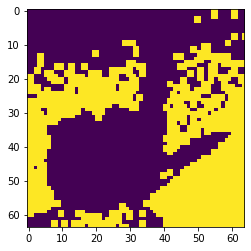

In [31]:
pic = r"D:/Research/Frame/testImage/g2_test.png"
img = cv2.imread(pic)
# img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 64,64, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


[[1.0000 0.0000 0.0000 0.0000 0.0000]]
Gesture: 1


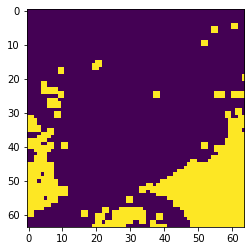

In [32]:
pic = r"D:/Research/Frame/testImage/g3_test.png"
img = cv2.imread(pic)
# img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 64,64, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)

[[0.0000 0.0000 0.0000 1.0000 0.0000]]
Gesture: 4


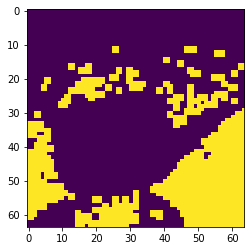

In [33]:
pic = r"D:/Research/Frame/testImage/g4_test.png"
img = cv2.imread(pic)
# img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 64,64, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


[[1.0000 0.0000 0.0000 0.0000 0.0000]]
Gesture: 1


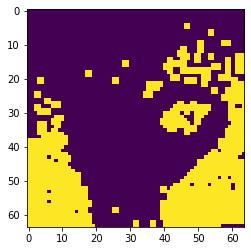

In [34]:
pic = r"D:/Research/Frame/testImage/g5_test.png"
img = cv2.imread(pic)
# img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 64,64, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [ ]:
# H,S,V = number_of_elements(img)
# h = collections.Counter(H)
# s = collections.Counter(S)
# v = collections.Counter(V)
# new_h = sorted(H)

In [ ]:
# plt.hist(new_h,bins=180)

In [ ]:
# plt.hist(S,bins=255)

In [ ]:
# plt.hist(V,bins=255)

In [ ]:
# lower = np.array([0,0,0],dtype='uint8')
# upper = np.array([90,10,255],dtype='uint8')
# skinRegionHSV = cv2.inRange(img, lower, upper)
# bin = cv2.blur(skinRegionHSV,(2,2))
# _,thresh = cv2.threshold(bin,0,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)

In [ ]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [ ]:
# plt.imshow(thresh)

In [ ]:
# #輪郭抽出
# contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 50,contours))
# cv2.drawContours(thresh,contours,-1,color=(0,0,255),thickness=2)
# plt.imshow(thresh)

In [ ]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [ ]:
# thresh = thresh.reshape(1,64,64,1)

In [ ]:
# test = model.predict(thresh)
# print(test)